# Prediction of Hospital Readmission of U.S Diabetic Patients 

This project aims to predict the readmission of diabetic patients at U.S Hospitals. Given features as a patient information (age, gender, race, weight), medical information (number of medication, number of lab procedures, time in hospital) and other technical features (related with the medical diagnostic), the objective is to predict if the patient will be readmitted or will not in the next 30 days.

For the Machine Learning part, we choice a mix of models. First, for the preprocessing phase, we used Principal Components Analysis (PCA) for dimensionality reduction. Next, we tried with two variants of Naïve Bayes classifier (Bernoulli and Gaussian based). After that, we tried traditional models as K-Nearest Neighbors and Logistic Regression. Finally, we applied Artificial Neural Networks (ANN) in this task.

Readmission is a measurement that is correlated with quality in hospitals. The more readmission rate, the less score in quality (at least in U.S). Moreover, low quality equals serious penalizations to hospitals. Therefore, if we could identify the patients with high probability of being readmitted, we could create interventions to provide additional assistance in order to avoid future readmission. In this way, we improve quality and save cost for penalties.  

###Content:
###1. Getting started
###2. Data exploration
###3. Preprocessing
###4. Data analysis
###5. Modeling
###6. Results

# 1. Getting started

In [0]:
#Libraries

#Data Wrangling
import pandas as pd
import numpy as np

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_precision_recall_curve

#Models
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

#Graphs
import matplotlib.pyplot as plt

#Dimensionality Reduction
from sklearn.decomposition import PCA

In [0]:
#Importing the dataset
url = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/diabetic_data.csv"

#Reading the dataset
dataset = pd.read_csv(url)

# 2. Data Exploration

In [3]:
#Displaying the dataset
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Displaying the info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# 3. Preprocessing

In [0]:
#Selecting target values
y = dataset["readmitted"]

In [6]:
#Printing the target values
y.head(n=15)

0      NO
1     >30
2      NO
3      NO
4      NO
5     >30
6      NO
7     >30
8      NO
9      NO
10    >30
11    <30
12    <30
13     NO
14    >30
Name: readmitted, dtype: object

In [0]:
#Performing label encoding 
y.replace("NO",0,inplace=True)

In [8]:
#Showing the results of label encoding
y.head(n=15)

0       0
1     >30
2       0
3       0
4       0
5     >30
6       0
7     >30
8       0
9       0
10    >30
11    <30
12    <30
13      0
14    >30
Name: readmitted, dtype: object

In [0]:
#Performing label encoding
y.replace(["<30",">30"],1,inplace=True)

In [10]:
#Showing the results of label encoding
y.head(n=15)

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    1
11    1
12    1
13    0
14    1
Name: readmitted, dtype: int64

# 4. Data Analysis

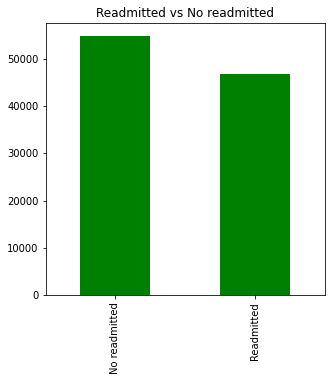

In [11]:
#Plotting the target feature
dataset["readmitted"].replace(to_replace = {0:"No readmitted", 1:"Readmitted"}, value = None, inplace = True)
dataset["readmitted"].value_counts().plot(kind = "bar", color = "green", title = "Readmitted vs No readmitted", figsize = (5,5))
dataset["readmitted"].replace(to_replace = {"No readmitted":0, "Readmitted":1}, value = None, inplace = True)

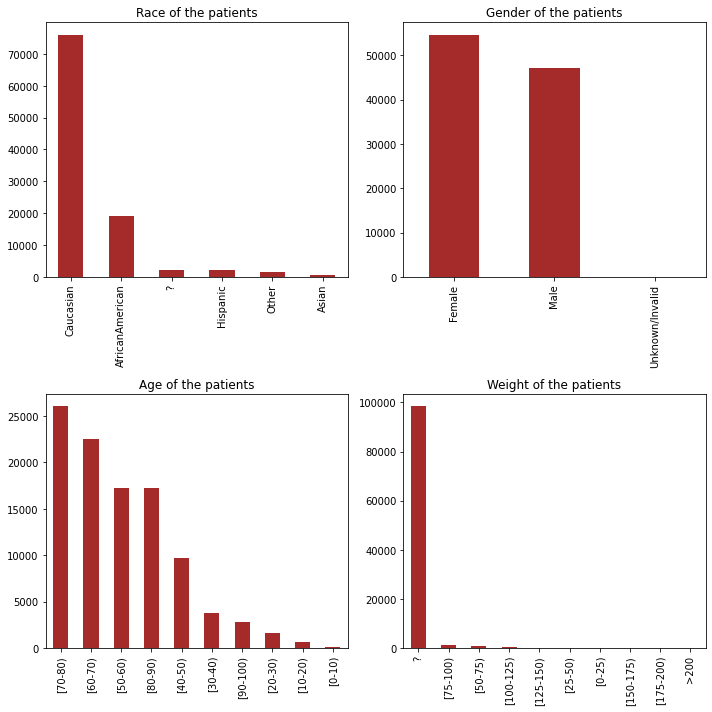

In [12]:
#Creating a figure
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

#Plotting the race, gender, age and weight of the patients
dataset["race"].value_counts().plot(kind = "bar", color = "brown", title = "Race of the patients", ax = axes[0,0])
dataset["gender"].value_counts().plot(kind = "bar", color = "brown", title = "Gender of the patients", ax = axes[0,1])
dataset["age"].value_counts().plot(kind = "bar", color = "brown", title = "Age of the patients", ax = axes[1,0])
dataset["weight"].value_counts().plot(kind = "bar", color = "brown", title = "Weight of the patients", ax = axes[1,1])

#Managing the aestethic layout
fig.tight_layout()

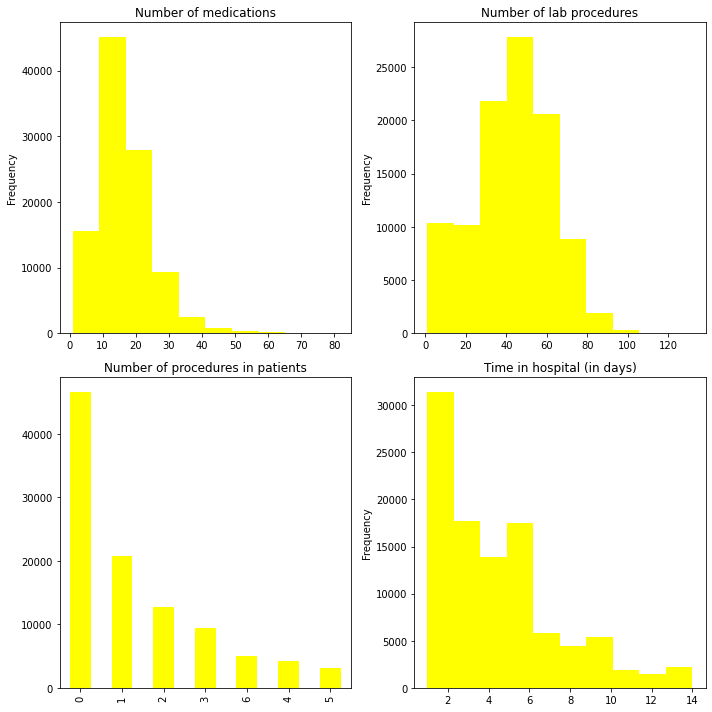

In [13]:
#Creating a figure
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

#Plotting the number of medications, the number of laboratory procedures, the number of internal procedures and the time in hospital of the patients
dataset["num_medications"].plot(kind = "hist", color = "yellow", title = "Number of medications", ax = axes[0,0])
dataset["num_lab_procedures"].plot(kind = "hist", color = "yellow", title = "Number of lab procedures", ax = axes[0,1])
dataset["num_procedures"].value_counts().plot(kind = "bar", color = "yellow", title = "Number of procedures in patients", ax = axes[1,0])
dataset["time_in_hospital"].plot(kind = "hist", color = "yellow", title = "Time in hospital (in days)", ax = axes[1,1])

#Managing the aestethic layout
fig.tight_layout()

# 5. Modeling

#5.0 One-Hot Encoding

In [0]:
#Storing the dataset in a local variable
X = dataset[["encounter_id", "patient_nbr", "race", "gender", "age", "weight", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital",            
"payer_code", "medical_specialty", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient",            
"diag_1", "diag_2", "diag_3", "number_diagnoses", "max_glu_serum", "A1Cresult", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",                 
"acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide",                     
"citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone",      
"change", "diabetesMed"]] 

In [0]:
#Performing One-Hot-Encoding
X = pd.get_dummies(X[["encounter_id", "patient_nbr", "race", "gender", "age", "weight", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital",            
"payer_code", "medical_specialty", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient",            
"diag_1", "diag_2", "diag_3", "number_diagnoses", "max_glu_serum", "A1Cresult", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",                 
"acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide",                     
"citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone",      
"change", "diabetesMed"]])

In [16]:
#Showing the results of One-Hot-Encoding
X.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),weight_>200,weight_?,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),...,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1


In [0]:
#Splitting the dasatet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y , random_state = 0)

#5.1 Principal Component Analysis as preprocessing step

In [0]:
#Calling a PCA object
pca = PCA(n_components = 2)

In [0]:
#Transforming the training set according to the PCA dimensionality reduction
X_train_pca = pca.fit_transform(X_train)

#Transforming the test set according to the PCA dimensionality reduction
X_test_pca = pca.fit_transform(X_test)


#5.2 K-Nearest Neighbors

In [20]:
#Using a K-Nearest model
k_nearest = KNeighborsClassifier(n_neighbors = 10)

#Fitting the model in the training data
k_nearest.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

#5.3 Bernoulli Naive Bayes

In [21]:
#Using a Bernoulli Naive Bayes model
naive_bayes_bernoulli = BernoulliNB(fit_prior = True)

#Fitting the model in the training data
naive_bayes_bernoulli.fit(X_train_pca, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#5.4 Gaussian Naive Bayes

In [22]:
#Using a Gaussian Naive Bayes model
naive_bayes_gaussian = GaussianNB()

#Fitting the model in the training data
naive_bayes_gaussian.fit(X_train_pca, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#5.5 Logistic Regression

In [23]:
#Using a Logistic Regression model
logit = LogisticRegression(class_weight ="balanced")

#Fitting the model in the training data
logit.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#5.6 Neural Networks: Simple Perceptron

In [24]:
#Using a simple perceptron model
perceptron = Perceptron(random_state = 0)

#Fitting the model in the training data
perceptron.fit(X_train_pca, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

#5.7 Neural Networks: Multi-Layer Perceptron

In [25]:
#Using a multi-layer perceptron
MLP_perceptron = MLPClassifier(solver = "adam", activation = "logistic", random_state = 0)

#Fitting the model in the training data
MLP_perceptron.fit(X_train_pca, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# 6. Results


#6.1 K-Nearest Neighbors

In [26]:
#Get the predictions
predictions_k_nearest = k_nearest.predict(X_test_pca)
print("Predictions: ")
print(predictions_k_nearest)
print("\n")

#Showing the scores
score_k_nearest = k_nearest.score(X_test_pca, y_test)
print("Accuracy: ")
print(score_k_nearest)
print("\n")

#Showing the classification report
report_k_nearest = classification_report(y_test, predictions_k_nearest)
print("Classification report: ")
print(report_k_nearest)

Predictions: 
[0 1 0 ... 0 0 0]


Accuracy: 
0.5698844430469303


Classification report: 
              precision    recall  f1-score   support

           0       0.58      0.72      0.64     13716
           1       0.55      0.39      0.46     11726

    accuracy                           0.57     25442
   macro avg       0.56      0.56      0.55     25442
weighted avg       0.57      0.57      0.56     25442



#6.2 Bernoulli Naive Bayes

In [27]:
#Get the predictions
predictions_naive_bayes_bernoulli = naive_bayes_bernoulli.predict(X_test_pca)
print("Predictions: ")
print(predictions_naive_bayes_bernoulli)
print("\n")

#Showing the scores
score_naive_bayes_bernoulli = naive_bayes_bernoulli.score(X_test_pca, y_test)
print("Accuracy")
print(score_naive_bayes_bernoulli)
print("\n")

#Showing the classification report
report_naive_bayes_bernoulli = classification_report(y_test, predictions_naive_bayes_bernoulli)
print("Classification report: ")
print(report_naive_bayes_bernoulli)

Predictions: 
[0 0 0 ... 0 1 0]


Accuracy
0.5627702224667872


Classification report: 
              precision    recall  f1-score   support

           0       0.59      0.63      0.61     13716
           1       0.53      0.48      0.50     11726

    accuracy                           0.56     25442
   macro avg       0.56      0.56      0.56     25442
weighted avg       0.56      0.56      0.56     25442



#6.3 Gaussian Naive Bayes

In [28]:
#Get the predictions
predictions_naive_bayes_gaussian = naive_bayes_gaussian.predict(X_test_pca)
print("Predictions: ")
print(predictions_naive_bayes_gaussian)
print("\n")

#Showing the scores
score_naive_bayes_gaussian = naive_bayes_gaussian.score(X_test_pca, y_test)
print("Accuracy")
print(score_naive_bayes_gaussian)
print("\n")

#Showing the classification report
report_naive_bayes_gaussian = classification_report(y_test, predictions_naive_bayes_gaussian)
print("Classification report: ")
print(report_naive_bayes_gaussian)

Predictions: 
[0 0 0 ... 0 0 0]


Accuracy
0.5790032230170584


Classification report: 
              precision    recall  f1-score   support

           0       0.58      0.78      0.67     13716
           1       0.57      0.34      0.43     11726

    accuracy                           0.58     25442
   macro avg       0.58      0.56      0.55     25442
weighted avg       0.58      0.58      0.56     25442



#6.4 Logistic Regression

In [29]:
#Get the predictions
predictions_logit = logit.predict(X_test_pca)
print("Predictions: ")
print(predictions_logit)
print("\n")

#Showing the scores
score_logit = logit.score(X_test_pca, y_test)
print("Accuracy: ")
print(score_logit)
print("\n")

#Showing the classification report
report_logit = classification_report(y_test, predictions_logit)
print("Classification report: ")
print(report_logit)

Predictions: 
[0 0 0 ... 0 0 0]


Accuracy: 
0.5622592563477714


Classification report: 
              precision    recall  f1-score   support

           0       0.59      0.62      0.60     13716
           1       0.53      0.50      0.51     11726

    accuracy                           0.56     25442
   macro avg       0.56      0.56      0.56     25442
weighted avg       0.56      0.56      0.56     25442



#6.5 Neural Networks: Simple Perceptron

In [30]:
#Get the predictions
predictions_perceptron = perceptron.predict(X_test_pca)
print("Predictions: ")
print(predictions_perceptron)
print("\n")

#Showing the scores
score_perceptron = perceptron.score(X_test_pca, y_test)
print("Accuracy: ")
print(score_perceptron)
print("\n")

#Showing the classification report
report_perceptron = classification_report(y_test, predictions_perceptron)
print("Classification report: ")
print(report_perceptron)

Predictions: 
[1 0 0 ... 0 1 0]


Accuracy: 
0.5257448313811808


Classification report: 
              precision    recall  f1-score   support

           0       0.57      0.51      0.54     13716
           1       0.49      0.55      0.51     11726

    accuracy                           0.53     25442
   macro avg       0.53      0.53      0.53     25442
weighted avg       0.53      0.53      0.53     25442



#6.6 Neural Networks: Multi-Layer Perceptron

In [31]:
#Get the predictions
predictions_MLP_perceptron = MLP_perceptron.predict(X_test_pca)
print("Predictions: ")
print(predictions_MLP_perceptron)
print("\n")

#Showing the scores
score_MLP_perceptron = MLP_perceptron.score(X_test_pca, y_test)
print("Accuracy: ")
print(score_MLP_perceptron)
print("\n")

#Showing the classification report
report_MLP_perceptron = classification_report(y_test, predictions_MLP_perceptron)
print("Classification report: ")
print(report_MLP_perceptron)

Predictions: 
[0 0 0 ... 0 1 0]


Accuracy: 
0.5600974766134738


Classification report: 
              precision    recall  f1-score   support

           0       0.57      0.76      0.65     13716
           1       0.54      0.33      0.41     11726

    accuracy                           0.56     25442
   macro avg       0.55      0.54      0.53     25442
weighted avg       0.55      0.56      0.54     25442

